# PATTERN RECOGNITION EXERCISE
    

In [222]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Dense, Activation
from keras.models import Sequential
import numpy as np
import seaborn as sns



print('Libraries have been loaded')

Libraries have been loaded


## Data pre-processing

###Θα φορτώσουμε τα δεδομένα πάνω στο πρόγραμμα και θα κάνουμε μια έρευνα στις πρωτες γραμμές-εγγραφές

In [223]:
dataset = pd.read_csv('housing.csv') # Load the database
dataset.head() #with this function i can see the first 5 records of housing csv (rows)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


###Μπορούμε να δούμε στατιστικές πληροφοριες 

In [224]:
dataset.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


###Θα Προσδιορίσουμε τις κατηγορίες και τις αριθμητικές τιμές του συνόλου δεδομένων

In [225]:
X = dataset[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
 'population','households','median_income','ocean_proximity']]
z = dataset[['median_house_value']]

## 1)Αναγνωρίση των υποσύνολων

In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


####Παραπάνω παρατηρήσαμε οτι   κάθε στήλη στο σύνολο δεδομένων είναι αριθμητική (float64), εκτός από την τελευταία στήλη, η οποία είναι κατηγορηματική (string).θα ξεχωρισουμε τα χαρηκτηριστηκα στις μεταβλητες X και z οπου z θα ειναι το median_house_value

####Αριθμιτικα-κατηφορικα

In [227]:
categorical = [col for col in X.columns if X[col].dtype=='object']
numerical = [col for col in X.columns if X[col].dtype!='object']

## 2) Κλιμάκωση

#### Χρησιμοποιούμε την τεχνική MinMax για να βρίσκονται όλα τα δεδομένα μας στην κλίμακα 0-1

In [228]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical]),columns=numerical)
X_temp = X.drop(numerical, axis=1)
X = pd.concat([X_temp, X_scaled], axis=1)
X.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,NEAR BAY,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,NEAR BAY,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,NEAR BAY,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,NEAR BAY,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,NEAR BAY,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776


In [229]:
#do the same for the z
z = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
z.head()

,median_house_value
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638


###Αυτο που θελουμε ειναι οι μεγιστες τιμες να ειναι 1 και οι ελαχιστες 0 

In [230]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083313,0.039869,0.081983,0.232464
std,0.199555,0.226988,0.246776,0.055486,0.065392,0.031740,0.062873,0.131020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045779,0.021974,0.045881,0.142308
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
z.describe()

,median_house_value
count,20640.000000
mean,0.395579
std,0.237928
min,0.000000
25%,0.215671
50%,0.339588
75%,0.514897
max,1.000000


## 3)ΟΝΕ-ΗΟΤ 

In [232]:
#we use one-hot encoding to face the categorical attribute 'ocean_proximity'
oc_prox = X['ocean_proximity'].unique()
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False) #sparse=False?
X_enc = pd.DataFrame(encoder.fit_transform(X[categorical]),columns=oc_prox)
#X_enc.index = X.index
X_temp = X.drop(categorical,axis=1)
X = pd.concat([X_temp,X_enc],axis=1)
X.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0


## 4)Ελλειπείς τιμές

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<AxesSubplot: >

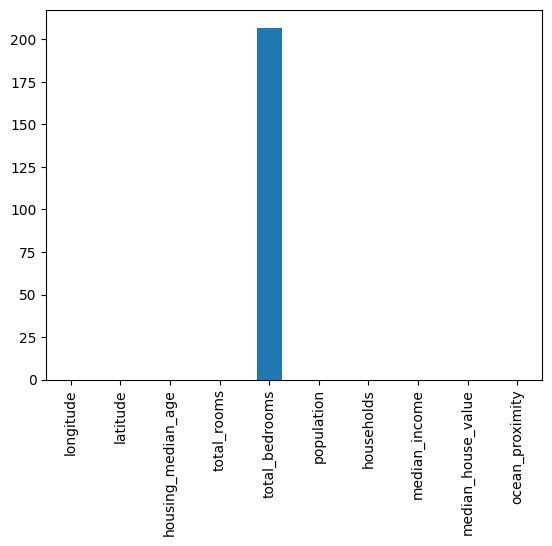

In [233]:
lost = dataset.isnull().sum()
print(lost)
lost.plot.bar()

####Χρησιμοποιούμε τον SimpleImputer με strategy="median" για να γεμίσουμε τις ελλιπείς τιμές με τη
διάμεση τιμή και μετά αντικαθιστούμε τις παλιές στήλες του Χ (που έχουν nan τιμές) με τις νέες (που δεν
έχουν)

In [234]:
imputer = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(imputer.fit_transform(X[numerical]),columns=numerical)
X_temp = X.drop(numerical,axis=1)
X = pd.concat([X_temp,X_imp],axis=1)
print(X.isnull().sum())

NEAR BAY              0
<1H OCEAN             0
INLAND                0
NEAR OCEAN            0
ISLAND                0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


# Data Visualization

###Για το ποιό ιστόγραμμα θα αναπαραστείται υπάρχει αναλογο σχόλιο σε κάθε κομμάτι του κόδικα

<AxesSubplot: xlabel='longitude', ylabel='Count'>

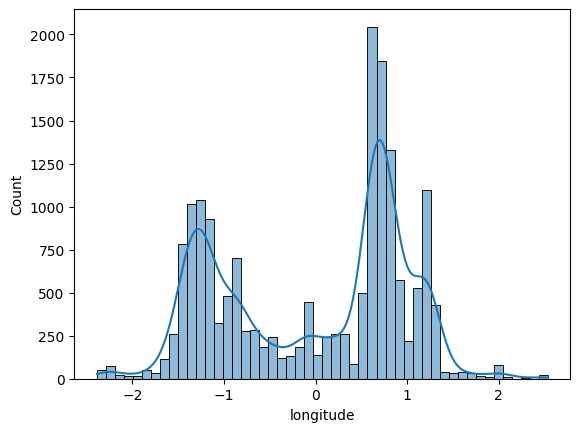

In [235]:
# longitude
sns.histplot(data[data.columns[0]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='latitude', ylabel='Count'>

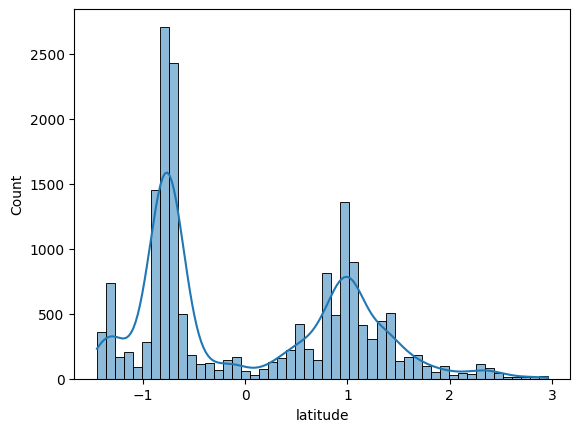

In [236]:
#latitude'
sns.histplot(data[data.columns[1]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='housing_median_age', ylabel='Count'>

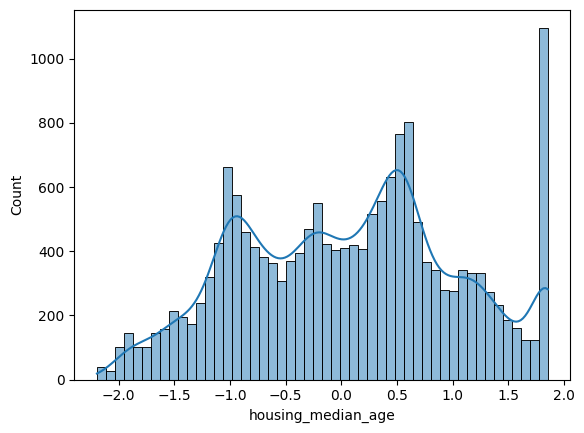

In [237]:
#'housing_median_age'
sns.histplot(data[data.columns[2]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='total_rooms', ylabel='Count'>

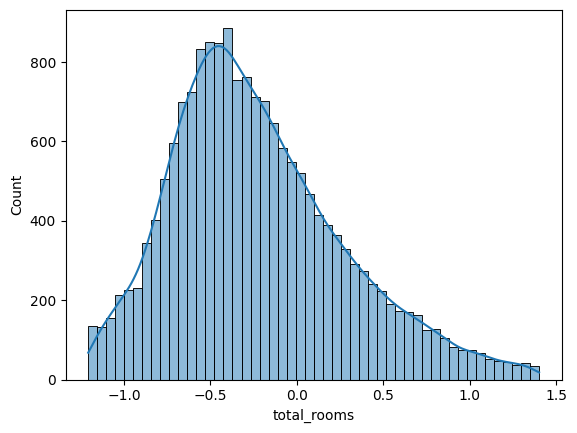

In [238]:
#'total_rooms'
sns.histplot(data[data.columns[3]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='total_bedrooms', ylabel='Count'>

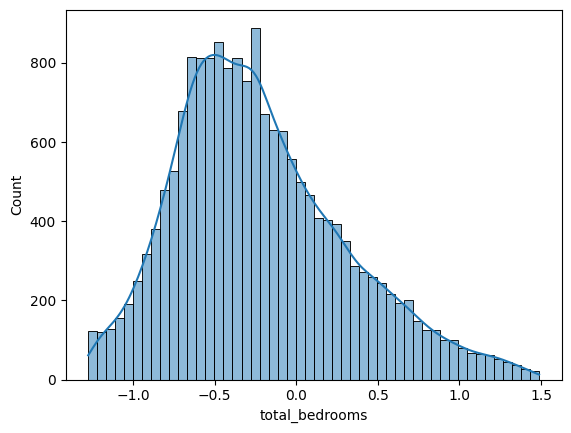

In [239]:
#'total_bedrooms'
sns.histplot(data[data.columns[4]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='population', ylabel='Count'>

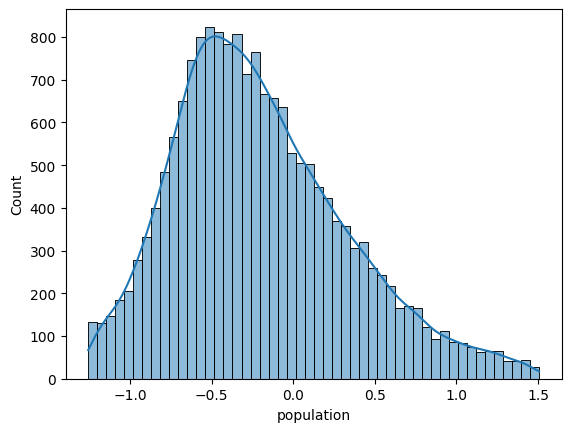

In [240]:
#'population'
sns.histplot(data[data.columns[5]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='households', ylabel='Count'>

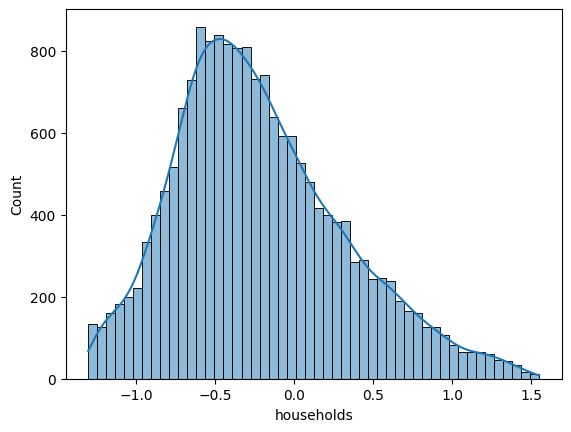

In [241]:
#'households'
sns.histplot(data[data.columns[6]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='median_income', ylabel='Count'>

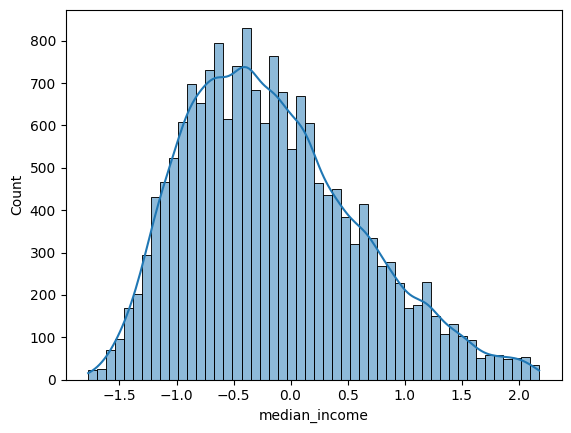

In [242]:
#'median_income'
sns.histplot(data[data.columns[7]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

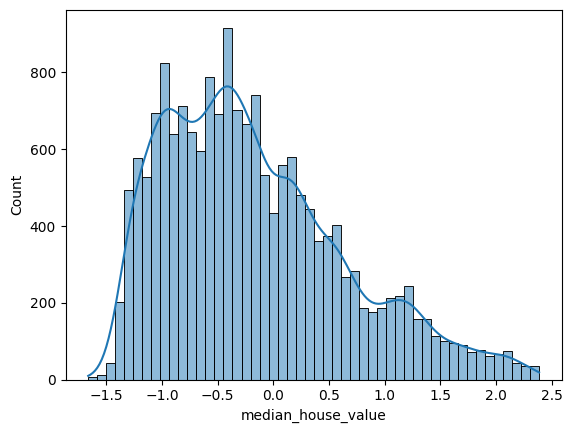

In [243]:
#'median_house_value'
sns.histplot(data[data.columns[8]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='<1H OCEAN', ylabel='Count'>

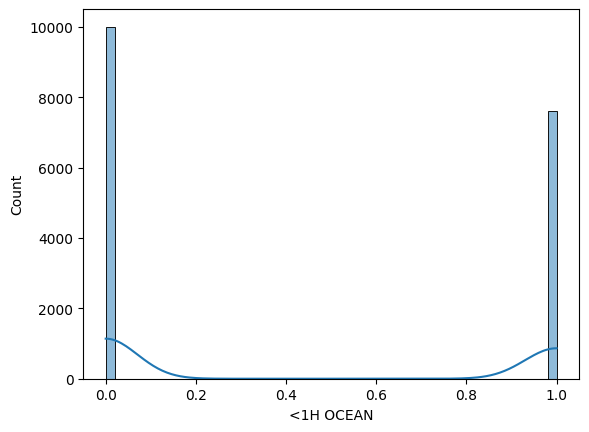

In [244]:
#'<1H OCEAN'
sns.histplot(data[data.columns[9]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='INLAND', ylabel='Count'>

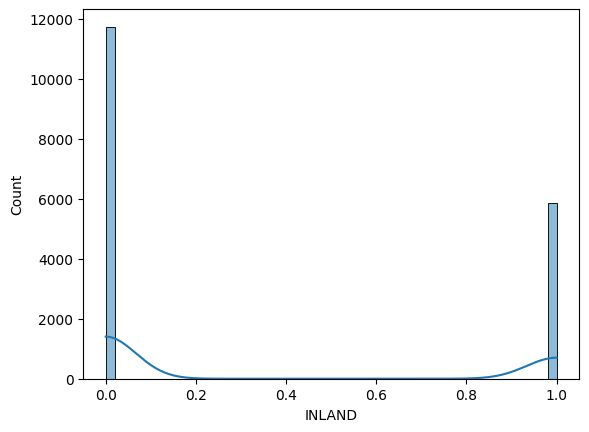

In [245]:
#'INLAND'
sns.histplot(data[data.columns[10]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='ISLAND', ylabel='Count'>

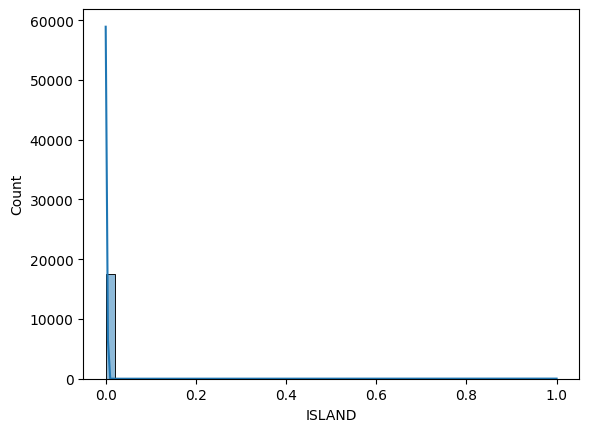

In [246]:
#'ISLAND'
sns.histplot(data[data.columns[11]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='NEAR BAY', ylabel='Count'>

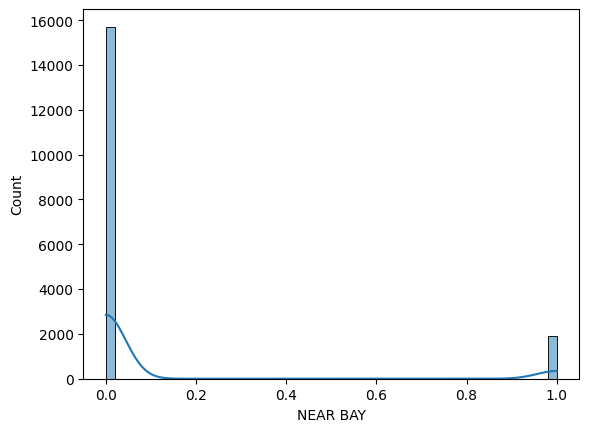

In [247]:
#'NEAR BAY'
sns.histplot(data[data.columns[12]],bins=50,kde=True,lw=2)

<AxesSubplot: xlabel='NEAR OCEAN', ylabel='Count'>

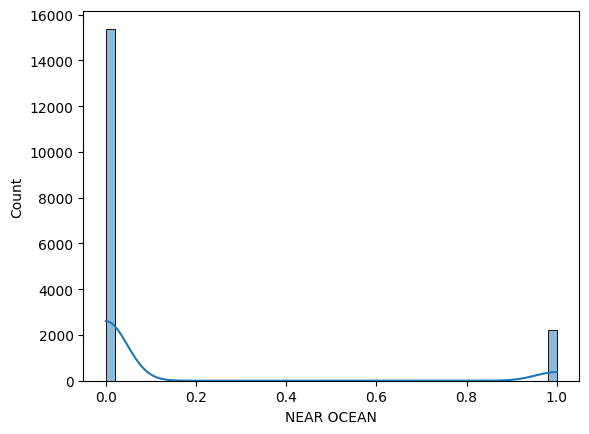

In [248]:
#'NEAR OCEAN'
sns.histplot(data[data.columns[13]],bins=50,kde=True,lw=2)

####Δημιουργούμε και εναν χάρτη θερμότητας του πίνακα συσχέτισης

## Pairs of varriables visualizations

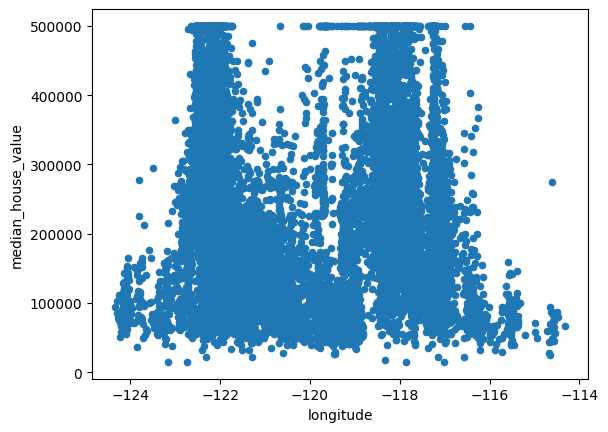

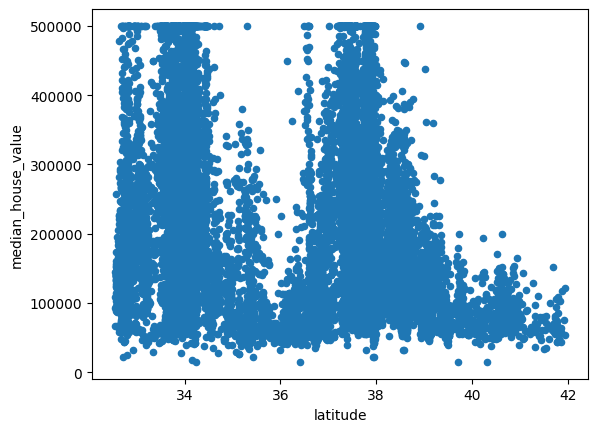

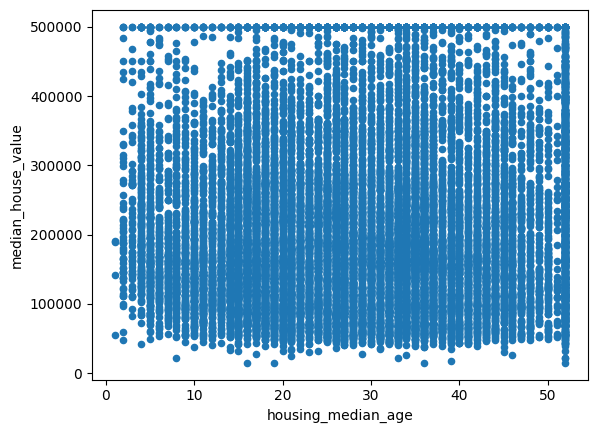

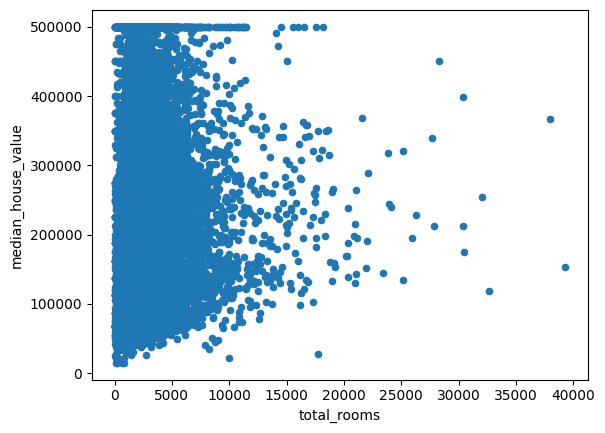

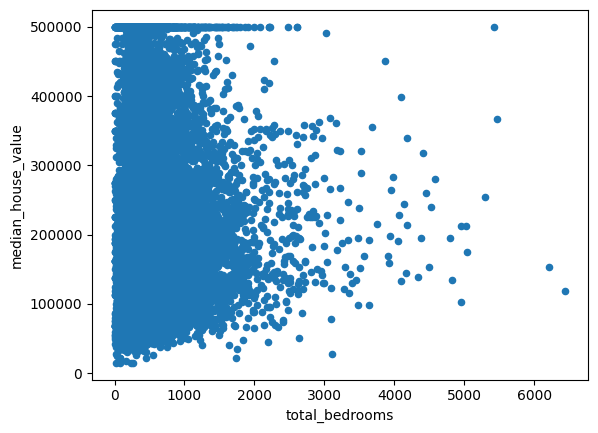

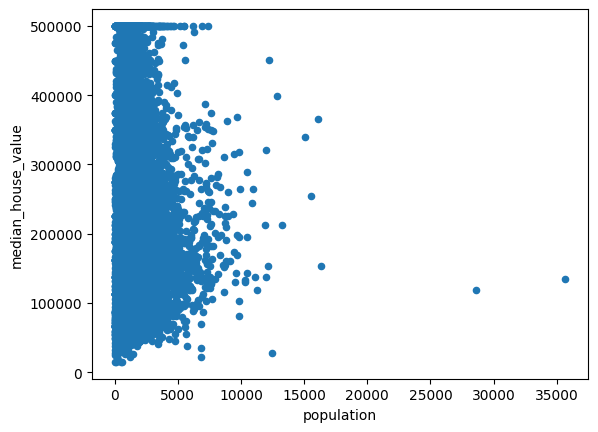

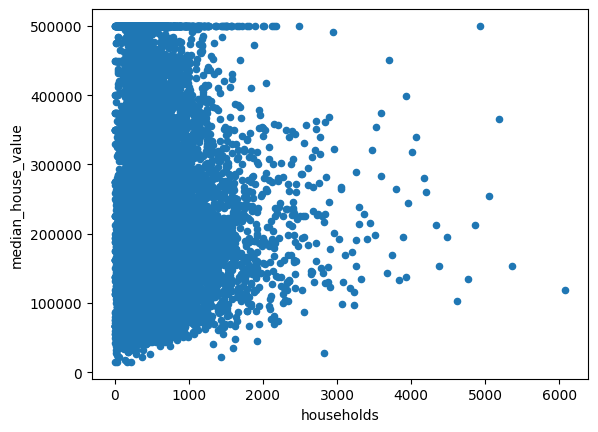

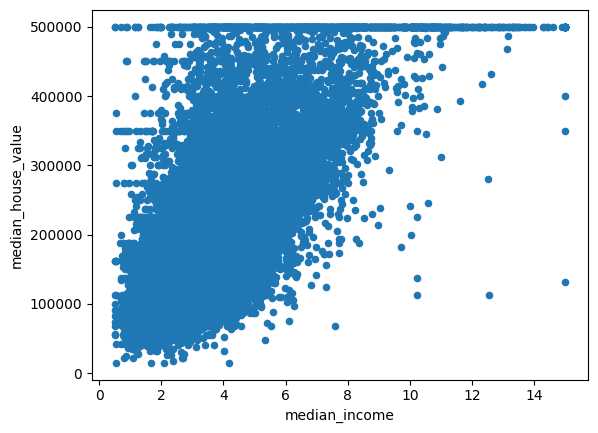

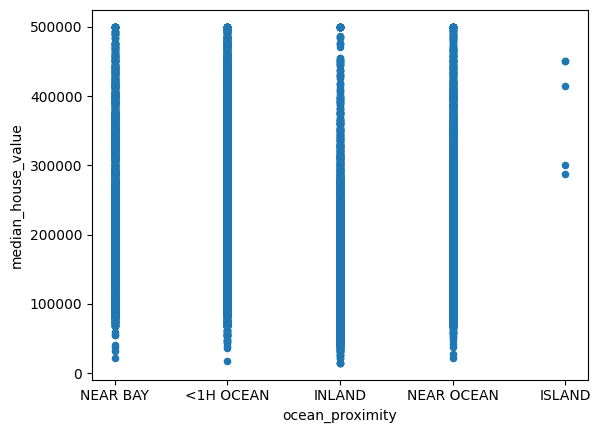

In [249]:
dataset.plot(kind="scatter",x="longitude",y="median_house_value")
dataset.plot(kind="scatter",x="latitude",y="median_house_value")
dataset.plot(kind="scatter",x="housing_median_age",y="median_house_value")
dataset.plot(kind="scatter",x="total_rooms",y="median_house_value")
dataset.plot(kind="scatter",x="total_bedrooms",y="median_house_value")
dataset.plot(kind="scatter",x="population",y="median_house_value")
dataset.plot(kind="scatter",x="households",y="median_house_value")
dataset.plot(kind="scatter",x="median_income",y="median_house_value")
dataset.plot(kind="scatter",x="ocean_proximity",y="median_house_value")

plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

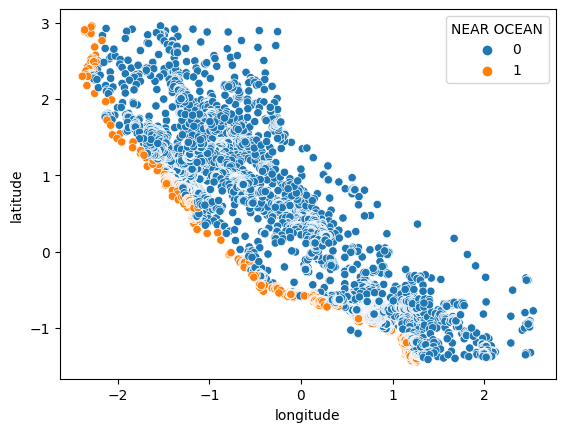

In [250]:
#the relation of longitude and latitude. Then, show in the same graph which houses are located near the ocean.
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['NEAR OCEAN'])

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

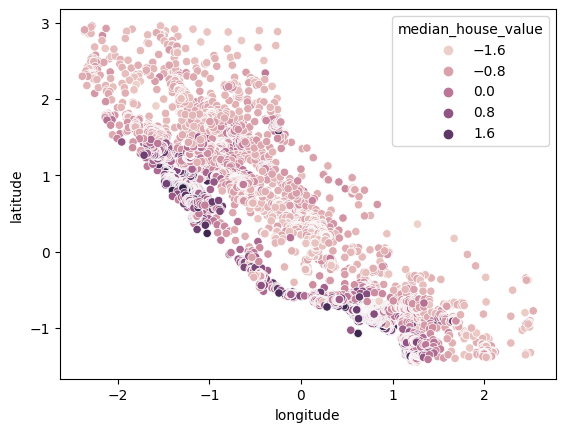

In [251]:
#houses cost along each area of Callifornia.
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['median_house_value'])

# Παλινδρόμηση Δεδομένων


## Last Square

##υλοποιήθηκαν οι συναρτησεις least_squares_train & least_squares_predict

In [252]:
def least_squares_train(X, y):
    mul1 = X.T.dot(X)
    inv1 = np.linalg.pinv(mul1)
    mul2 = X.T.dot(y)
    theta = np.matmul(inv1, mul2)
    return theta

def least_squares_predict(X, w):
    return np.matmul(X, w)

kf = KFold(n_splits=10)
for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    w = least_squares_train(X_train.to_numpy(), y_train.to_numpy())
    pred = least_squares_predict(X_test.to_numpy(), w)
    mse = mean_squared_error(y_test.to_numpy(), pred)
    mae = mean_absolute_error(y_test.to_numpy(), pred)
    print(f"Fold {k + 1} - MSE: {mse}")
    print(f"Fold {k + 1} - MAE: {mae}")
    print("\n")


Fold 1 - MSE: 7306445819.762907
Fold 1 - MAE: 69807.61393105896


Fold 2 - MSE: 3565413241.0120573
Fold 2 - MAE: 47373.14549299285


Fold 3 - MSE: 7755345331.922094
Fold 3 - MAE: 63224.759467397795


Fold 4 - MSE: 3940472038.5251455
Fold 4 - MAE: 47209.609502319436


Fold 5 - MSE: 6881773189.406185
Fold 5 - MAE: 61138.517272118814


Fold 6 - MSE: 4852123553.404929
Fold 6 - MAE: 47989.6854522758


Fold 7 - MSE: 2753517854.138328
Fold 7 - MAE: 37693.35666406169


Fold 8 - MSE: 8381066339.682972
Fold 8 - MAE: 68436.3153441601


Fold 9 - MSE: 6111689780.08459
Fold 9 - MAE: 57807.44509566541


Fold 10 - MSE: 2866911167.783155
Fold 10 - MAE: 38886.504697485354




# Πολυστρωματικό νευρωνικό δίκτυο


In [253]:
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    z_train, z_test = z.iloc[train_index], z.iloc[test_index]
    
    model = Sequential()
    model.add(Dense(13, activation = 'relu', input_dim = 13))
    model.add(Dense(units = 13, activation = 'relu')) # Hidden layer 1
    model.add(Dense(units = 13, activation = 'relu')) # Hidden layer 2
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    model.fit(X_train, z_train, batch_size = 10, epochs = 5)
    z_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_pred, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    
    print(f'MSE for Fold Number: {fold + 1}, {mse}')
    print(f'MAE for Fold Number: {fold + 1}, {mae}')
    print("\n")


Epoch 1/5
1858/1858 [==============================] - 3s 1ms/step - loss: 0.0241
Epoch 2/5
1858/1858 [==============================] - 2s 1ms/step - loss: 0.0196
Epoch 3/5
1858/1858 [==============================] - 2s 944us/step - loss: 0.0182
Epoch 4/5
1858/1858 [==============================] - 2s 876us/step - loss: 0.0174
Epoch 5/5
65/65 [==============================] - 0s 810us/step
MSE for Fold Number: 1, 2730345081.84659
MAE for Fold Number: 1, 37496.21326440619


Epoch 1/5
1858/1858 [==============================] - 2s 907us/step - loss: 0.0259
Epoch 2/5
1858/1858 [==============================] - 3s 2ms/step - loss: 0.0199
Epoch 3/5
1858/1858 [==============================] - 3s 1ms/step - loss: 0.0187
Epoch 4/5
1858/1858 [==============================] - 2s 1ms/step - loss: 0.0178
Epoch 5/5
65/65 [==============================] - 0s 1ms/step
MSE for Fold Number: 2, 2730345081.84659
MAE for Fold Number: 2, 37496.21326440619


Epoch 1/5
1858/1858 [===================